In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive')

import os
os.chdir('/content/gdrive/My Drive') 

Mounted at /content/gdrive


Source code berikut berfungsi untuk menghubungkan antara google colab dengan gdrive akun milik Anda. Diharapkan di gdrive anda sudah terdapat folder Dataset. Source code berikut juga mengubah working path anda ke path "/content/gdrive/My Drive", karena google colab ini menggunakan linux sebagai os-nya maka command-command linux dapat digunakan disini.

In [ ]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

function yang akan digunakan untuk mengecek path tree dari sebuah folder.
Source: 

In [ ]:
from imutils import paths

imgpths = paths.list_images('Dataset')
list_files('Dataset')

Dataset/
    Zophobas/
        Zophobas1.jpg
        Zophobas2.jpg
        Zophobas3.jpg
        Zophobas4.jpg
        Zophobas5.jpg
        Zophobas6.jpg
        Zophobas7.jpg
        Zophobas8.jpg
        Zophobas9.jpg
        Zophobas10.jpg
        Zophobas11.jpg
        Zophobas12.jpg
        Zophobas13.jpg
        Zophobas14.jpg
        Zophobas15.jpg
        Zophobas16.jpg
        Zophobas17.jpg
        Zophobas18.jpg
        Zophobas19.jpg
        Zophobas20.jpg
        Zophobas21.jpg
        Zophobas22.jpg
        Zophobas23.jpg
        Zophobas24.jpg
        Zophobas25.jpg
        Zophobas26.jpg
        Zophobas27.jpg
        Zophobas28.jpg
        Zophobas29.jpg
        Zophobas30.jpg
        Zophobas31.jpg
        Zophobas32.jpg
        Zophobas33.jpg
        Zophobas34.jpg
        Zophobas35.jpg
        Zophobas36.jpg
        Zophobas37.jpg
        Zophobas38.jpg
        Zophobas39.jpg
        Zophobas40.jpg
        Zophobas41.jpg
        Zophobas42.jpg
        Zophobas43.j

Simpan nama folder dari satu dir yang sama dengan working path. Contoh pada source code di atas, daataset disimpan pada folder Dataset. *imgpths* menyimpan nama folder, sedangkan untuk code berikutnya berfungsi menggunakan function *list_files* dari code sebelumnya dengan input nama folder letak disimpannya dataset.

Dataset
Zophobas


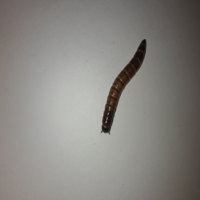

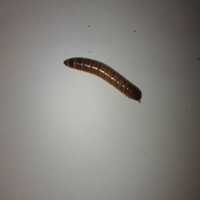

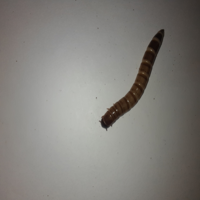

Tenebrio


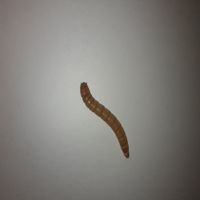

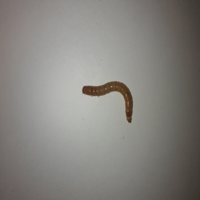

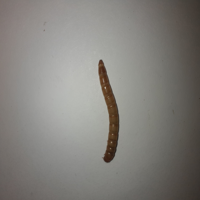

In [ ]:
from PIL import Image
import os
from IPython.display import display 
from imutils import paths

imgpths = paths.list_images('Dataset')
print('Dataset')
count=0
kelas_seb = None
for dirimg in imgpths:
  kelas = dirimg.split(os.path.sep) [1]
  if kelas_seb is None:
    print(kelas)
    kelas_seb = kelas
  if kelas_seb != kelas:
    print(kelas)
    count=0
    kelas_seb = kelas
  a = Image.open(dirimg)
 
  count=count+1
  if count <= 3:
    im =a.resize((200,200))
    display(im)
  else:
    continue


Source code berikut berfungsi untuk mengambil nama folder yang ada pada folder Dataset dan mengambil setiap nama file gambar, kemudian untuk setiap folder atau kelas yang ada di Dataset akan ditampilkan gambar yang ada di subfolder berikut masing-masing 3 gambar.

In [ ]:
imgpths = paths.list_images('Dataset')
count=1
kelas_seb = None
for dirimg in imgpths:
  dir = dirimg.split(os.path.sep)[0]
  kelas = dirimg.split(os.path.sep)[1]
  nama = dirimg.split(os.path.sep)[2]
  if kelas_seb is None:
    kelas_seb = kelas
  if kelas_seb != kelas:
    count=1
    kelas_seb = kelas
  pat = os.path.join(dir,kelas,nama)
  nama_baru = kelas+str(count)+'.jpg'
  os.rename(pat,os.path.join(dir,kelas,nama_baru))
  count=count+1


Source code berikut berfungssi untuk mengubah nama file dari setiap gambar yang berada dalam folder kelas menjadi berformat "(nama kelas)1.jpg", "(nama kelas)2.jpg", dst.

In [ ]:
def unique(list1):
 
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

Sebuah function untuk mendapatkan nilai-nilai unik dari sebuah list, menjadi list baru yang berisi nilai-nilai yang tidak berulang.

In [ ]:
import numpy as np

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['Zophobas', 'Tenebrio']

Source code berikut berfungsi untuk mengumpulkan semua gambar dataset dalam satu variabel dan melakukan rescale serta normalisasi dengan membagi nilai warna dengan 255. Kemudian menyimpan label dari setiap gambar sesuai dengan posisi gambar berada di subfolder kelas mana. Lalu, mendapatkan nilai unique dari label ini sehingga dapat mengetahui ada berapa kelas dalam dataset tersebut.

In [ ]:
def image_to_feature_vector(image, size=(224, 224)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [ ]:
#import numpy as np

def plot_confusion_matrix(cm,
                          target_names=kelas_asli,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
import numpy as np
import cv2

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  nil_pix = image_to_feature_vector(gmbrz)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("[INFO] Inisialisasi Model")



[INFO] Inisialisasi Model




Experiment for k= 1  on all folds

List of Acc. on all folds: [90.625  84.375  81.25   81.25   82.8125 82.8125 75.     92.1875 89.0625
 75.    ]

Max Acc: 92.19 %
Min Acc: 75.0 %
Average : 83.44 %
Standard Deviation: 5.9
Confusion Matrix and its plot:
 [[319.   1.]
 [105. 215.]]


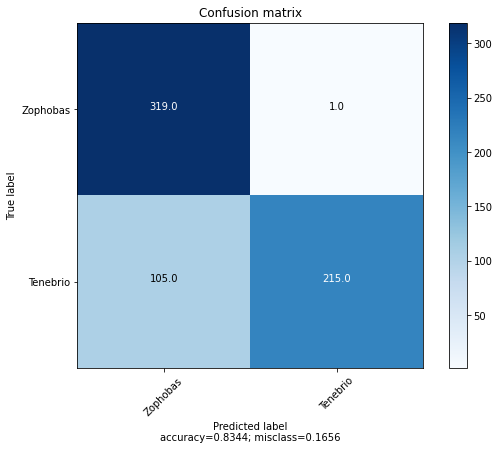



Experiment for k= 3  on all folds

List of Acc. on all folds: [84.375  81.25   81.25   82.8125 76.5625 78.125  73.4375 81.25   82.8125
 78.125 ]

Max Acc: 84.38 %
Min Acc: 73.44 %
Average : 80.0 %
Standard Deviation: 3.36
Confusion Matrix and its plot:
 [[320.   0.]
 [128. 192.]]


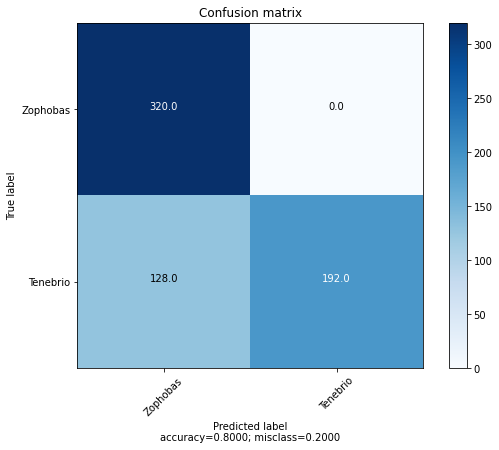



Experiment for k= 5  on all folds

List of Acc. on all folds: [82.8125 79.6875 76.5625 82.8125 71.875  75.     68.75   75.     79.6875
 76.5625]

Max Acc: 82.81 %
Min Acc: 68.75 %
Average : 76.88 %
Standard Deviation: 4.53
Confusion Matrix and its plot:
 [[320.   0.]
 [148. 172.]]


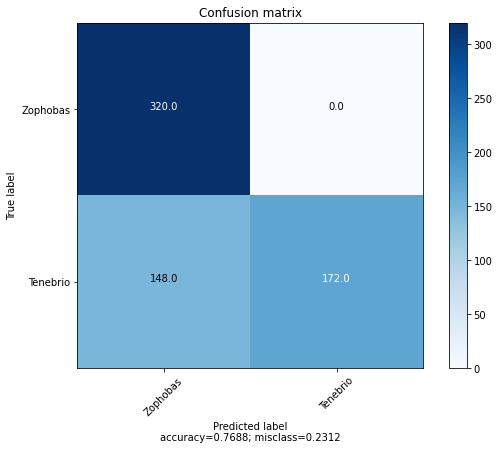



Experiment for k= 7  on all folds

List of Acc. on all folds: [84.375  76.5625 76.5625 76.5625 73.4375 75.     67.1875 73.4375 79.6875
 75.    ]

Max Acc: 84.38 %
Min Acc: 67.19 %
Average : 75.78 %
Standard Deviation: 4.43
Confusion Matrix and its plot:
 [[320.   0.]
 [155. 165.]]


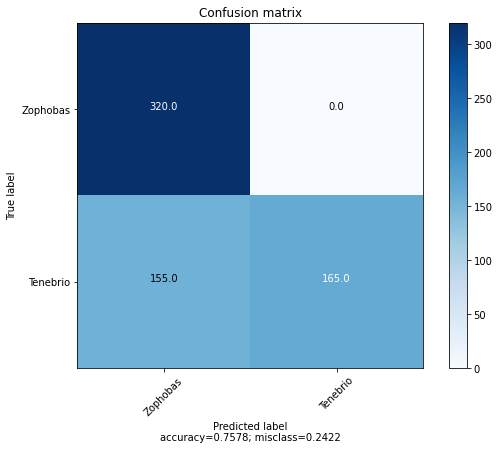



Experiment for k= 9  on all folds

List of Acc. on all folds: [76.5625 71.875  75.     75.     68.75   71.875  65.625  71.875  76.5625
 70.3125]

Max Acc: 76.56 %
Min Acc: 65.62 %
Average : 72.34 %
Standard Deviation: 3.54
Confusion Matrix and its plot:
 [[320.   0.]
 [177. 143.]]


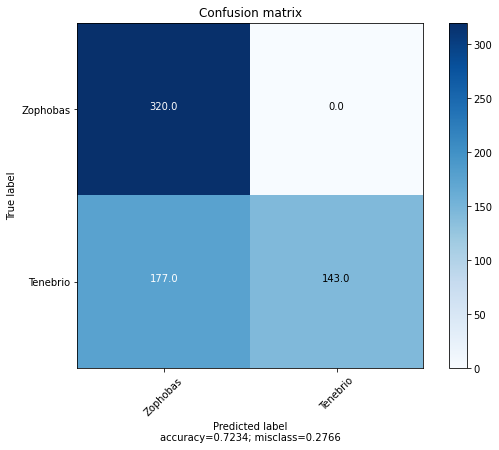



=============== SUMARY K-NN FOR EACH k ON ALL FOLDS ================
[[90.625 84.375 81.25  81.25  82.812 82.812 75.    92.188 89.062 75.   ]
 [84.375 81.25  81.25  82.812 76.562 78.125 73.438 81.25  82.812 78.125]
 [82.812 79.688 76.562 82.812 71.875 75.    68.75  75.    79.688 76.562]
 [84.375 76.562 76.562 76.562 73.438 75.    67.188 73.438 79.688 75.   ]
 [76.562 71.875 75.    75.    68.75  71.875 65.625 71.875 76.562 70.312]]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

allres = []
for k in [1,3,5,7,9]:
    print('\n\nExperiment for k=',k,' on all folds')
    model = KNeighborsClassifier(n_neighbors=k)
    SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    lst_acc_SF = []
    kumpl_lbl = np.array(kumpl_lbl)
    kumpl_gmbr = np.array(kumpl_gmbr)
    
    num_label=len(kelas_asli)
    all_cm=np.zeros((num_label,num_label))
    for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
        xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
        ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
        model.fit(xlatih_sf, ylatih_sf)
        lst_acc_SF.append(100*model.score(xuji_sf, yuji_sf))

        #for cm only
        from sklearn.metrics import confusion_matrix
        predict = model.predict(xuji_sf)
        cm=confusion_matrix(yuji_sf, predict)
        all_cm=all_cm+cm
      
    print('\nList of Acc. on all folds:', np.around(lst_acc_SF,decimals=4))
    print('\nMax Acc:',
          np.around( max(lst_acc_SF),decimals=2), '%')
    print('Min Acc:',
          np.around(min(lst_acc_SF),decimals=2), '%')
    print('Average :',
          np.around(mean(lst_acc_SF),decimals=2), '%')
    print('Standard Deviation:', 
          np.around(stdev(lst_acc_SF),decimals=2))
    allres.append(lst_acc_SF)
    print('Confusion Matrix and its plot:\n',all_cm)
    plot_confusion_matrix(all_cm,normalize=False)


print('\n\n=============== SUMARY K-NN FOR EACH k ON ALL FOLDS ================')
print(np.around(allres,decimals=3))


**SVM**

In [ ]:
import numpy as np
import cv2
from skimage.color import rgb2gray


kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  grey_image = rgb2gray(gmbrz)
  nil_pix = image_to_feature_vector(grey_image)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC(kernel='linear')


List of Acc.: [96.875  95.3125 92.1875 92.1875 90.625  95.3125 93.75   95.3125 87.5
 90.625 ]
Max Acc.: 96.875 %
Min Acc.: 87.5 %
Average: 92.96875 %
Standard Deviation: 2.8764
Confusion Matrix and its plot:
 [[310.  10.]
 [ 35. 285.]]


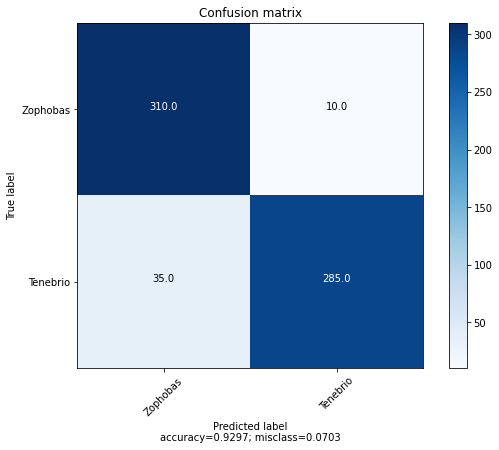

In [ ]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_acc_SF = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)

num_label=len(kelas_asli)
all_cm=np.zeros((num_label,num_label))

for latih_idx, uji_idx in SF.split(kumpl_gmbr, kumpl_lbl):
    xlatih_sf, xuji_sf = kumpl_gmbr[latih_idx], kumpl_gmbr[uji_idx]
    ylatih_sf, yuji_sf = kumpl_lbl[latih_idx], kumpl_lbl[uji_idx]
    svm.fit(xlatih_sf, ylatih_sf)
    lst_acc_SF.append(100*svm.score(xuji_sf, yuji_sf))
    #for cm only
    from sklearn.metrics import confusion_matrix
    predict = svm.predict(xuji_sf)
    cm=confusion_matrix(yuji_sf, predict)
    all_cm=all_cm+cm
print('List of Acc.:', np.around(lst_acc_SF,decimals=4))
print('Max Acc.:',
      max(lst_acc_SF), '%')
print('Min Acc.:',
      min(lst_acc_SF), '%')
print('Average:',
      mean(lst_acc_SF), '%')
print('Standard Deviation:', np.around(stdev(lst_acc_SF),decimals=4))
print('Confusion Matrix and its plot:\n',all_cm)
plot_confusion_matrix(all_cm,normalize=False)
